In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)


In [2]:
dataset = pd.read_csv("Ionosphere.csv")

print("First 5 rows:")
print(dataset.head())

First 5 rows:
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           1           0     0.99539    -0.05889     0.85243     0.02306   
1           1           0     1.00000    -0.18829     0.93035    -0.36156   
2           1           0     1.00000    -0.03365     1.00000     0.00485   
3           1           0     1.00000    -0.45161     1.00000     1.00000   
4           1           0     1.00000    -0.02401     0.94140     0.06531   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute26  \
0     0.83398    -0.37708     1.00000      0.03760  ...     -0.51171   
1    -0.10868    -0.93597     1.00000     -0.04549  ...     -0.26569   
2     1.00000    -0.12062     0.88965      0.01198  ...     -0.40220   
3     0.71216    -1.00000     0.00000      0.00000  ...      0.90695   
4     0.92106    -0.23255     0.77152     -0.16399  ...     -0.65158   

   Attribute27  Attribute28  Attribute29  Attribute30  Attribute31  \
0      0.41078     -

In [3]:
X = dataset.drop("Target", axis=1).values

y_01 = dataset["Target"].values

y = np.where(y_01 == 1, 1, -1)

print("\nData shape:", X.shape)
print("Class counts (0/1):", np.bincount(y_01))


Data shape: (351, 34)
Class counts (0/1): [126 225]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)


=== Adaline (scratch) ===
Accuracy: 0.183
Confusion matrix (rows=true, cols=pred) [-1,+1]:
 [[ 6 19]
 [39  7]]


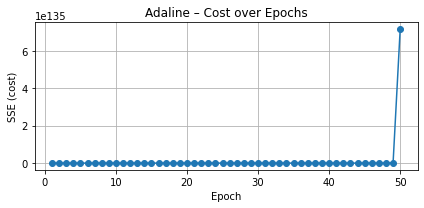

In [5]:
class AdalineGD:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.loss_ = []
        for _ in range(self.epochs):
            net = self.net_input(X)
            err = y - net
            self.w_[1:] += self.eta * X.T @ err
            self.w_[0]  += self.eta * err.sum()
            self.loss_.append(0.5 * (err ** 2).sum()) 
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return 1 if self.net_input(x) >= 0.0 else -1


ada = AdalineGD(eta=0.01, epochs=50).fit(X_train_std, y_train)
y_pred_ada = np.array([ada.predict(xi) for xi in X_test_std])
acc_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada, labels=[-1, 1])

print("\n=== Adaline (scratch) ===")
print("Accuracy:", round(acc_ada, 3))
print("Confusion matrix (rows=true, cols=pred) [-1,+1]:\n", cm_ada)

plt.figure(figsize=(6, 3))
plt.plot(range(1, len(ada.loss_) + 1), ada.loss_, marker='o')
plt.xlabel("Epoch")
plt.ylabel("SSE (cost)")
plt.title("Adaline – Cost over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()
